In [121]:
# Assignment 4a | Vanishing Gradients

from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
iris = load_iris()
X = iris.data # shape (150, 4)
y = iris.target  # shape (150,)

# 1 | Instantiate a sequential model

model = Sequential()

# Input layer with specified input shape

model.add(Input(shape=(4,))) # 4 predictors: sepal, length, sepal width, petal length, petal width

# 10 Hidden layers, 10 neurons each, sigmoid activation

for _ in range(10):
    model.add(Dense(10, activation='sigmoid'))

# Output layer, since iris has 3 classes, use 3 neurons with softmax activation

model.add(Dense(3, activation ='softmax'))

model.summary

<bound method Model.summary of <Sequential name=sequential_78, built=True>>

In [123]:
# 2 | Computed Loss Function & Gradients

def get_gradients(model, X, y, batch_size=16):
    with tf.GradientTape() as tape:
        predictions = model(X[:batch_size], training=True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y[:batch_size], predictions)
    
    gradients = tape.gradient(loss, model.trainable_weights)
    grad_norms = [np.linalg.norm(g.numpy()) for g in gradients if g is not None]
    return gradients, grad_norms

gradients, grad_norms = get_gradients(model, X, y)

In [124]:
# Function for 3-5
def build_grads(activation, X, y, n_layers=10, n_neurons=10, batch_size=26, use_batchnorm = True):
    # Builds model with given activation functions, computes gradient norms

    model = Sequential()

    model.add(Input(shape=(4,)))

    # Hidden Layers, adds batch normalization if True

    for _ in range(n_layers):
        model.add(Dense(n_neurons, activation=activation))
        if use_batchnorm:
            model.add(BatchNormalization())
        
                # Output layer for 3-class classification
    model.add(Dense(3, activation='softmax'))

# Prints a model summary for each activation function called
    
    print(f"\nModel Summary for activation {activation.upper()}" + 
          (" + BATCH NORM" if use_batchnorm else ""))
    model.summary()
    
        #Computes gradients

    gradients, grad_norms = get_gradients(model, X, y, batch_size=batch_size)

    return model, grad_norms


In [125]:
# 3-4 | Plot Gradient Norms Across Activations

# Sigmoid
_, grad_sigmoid = build_grads('sigmoid', X, y, use_batchnorm=False)
# ReLU
_, grad_relu = build_grads('relu', X, y, use_batchnorm=False)
# tanh
_, grad_tanh = build_grads('tanh', X, y, use_batchnorm=False)

# We are seeing signs of vanishing gradient because there are large gradient norms in 
#  in the first few layers, and there are rapidly decreasing values as we move towards 
#  the input layers

# When I change the number of layers, there is a substantial difference in the visual
#  aesthetics of the graphs. There is more chaos between the individuals layer component
#  pieces, there is also a "smoother," looking line


Model Summary for activation SIGMOID


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_941 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_942 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_943 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_944 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_945 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_946 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_947 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_948 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_949 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_950 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_951 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)


Model Summary for activation RELU


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_952 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_953 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_954 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_955 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_956 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_957 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_958 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_959 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_960 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_961 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_962 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)


Model Summary for activation TANH


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_963 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_964 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_965 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_966 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_967 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_968 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_969 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_970 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_971 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_972 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_973 (Dense)               │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

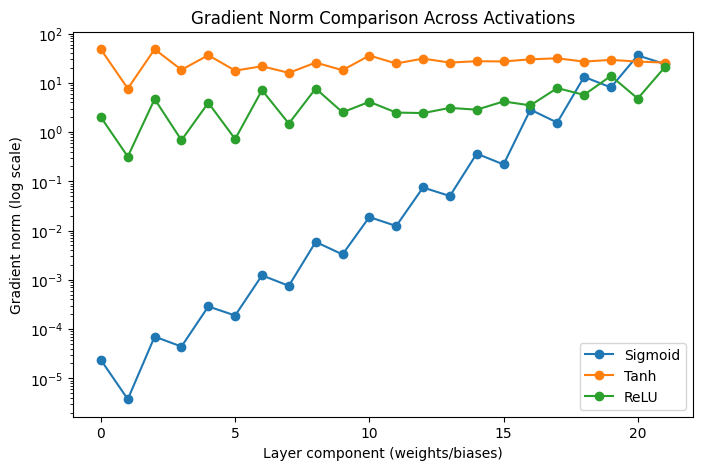

In [126]:
plt.figure(figsize=(8,5))
plt.plot(range(len(grad_sigmoid)), grad_sigmoid, marker='o', label='Sigmoid')
plt.plot(range(len(grad_tanh)), grad_tanh, marker='o', label='Tanh')
plt.plot(range(len(grad_relu)), grad_relu, marker='o', label='ReLU')
plt.yscale('log')
plt.xlabel('Layer component (weights/biases)')
plt.ylabel('Gradient norm (log scale)')
plt.legend()
plt.title('Gradient Norm Comparison Across Activations')
plt.show()


In [127]:
# 5 | Add Batch Normalization
_, grad_sigmoid_bn = build_grads('sigmoid', X, y, use_batchnorm=True)
# ReLU
_, grad_relu_bn = build_grads('relu', X, y, use_batchnorm=True)
# tanh
_, grad_tanh_bn = build_grads('tanh', X, y, use_batchnorm=True)


Model Summary for activation SIGMOID + BATCH NORM


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_974 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_370         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_975 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_371         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_976 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_372         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_977 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_373         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_978 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_374         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_979 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_375         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_980 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_376         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_981 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_377         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_982 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_378         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_983 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_379         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │             

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,273 (4.97 KB)

 Non-trainable params: 200 (800.00 B)


Model Summary for activation RELU + BATCH NORM


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_985 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_380         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_986 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_381         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_987 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_382         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_988 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_383         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_989 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_384         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_990 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_385         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_991 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_386         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_992 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_387         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_993 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_388         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_994 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_389         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │             

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,273 (4.97 KB)

 Non-trainable params: 200 (800.00 B)


Model Summary for activation TANH + BATCH NORM


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_996 (Dense)               │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_390         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_997 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_391         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_998 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_392         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_999 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_393         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1000 (Dense)              │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_394         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1001 (Dense)              │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_395         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1002 (Dense)              │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_396         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1003 (Dense)              │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_397         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1004 (Dense)              │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_398         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1005 (Dense)              │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_399         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │             

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,273 (4.97 KB)

 Non-trainable params: 200 (800.00 B)

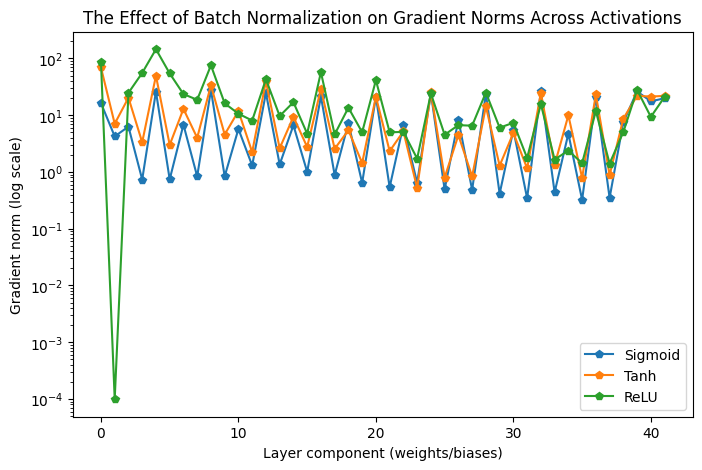

In [128]:
plt.figure(figsize=(8,5))
plt.plot(range(len(grad_sigmoid_bn)), grad_sigmoid_bn, marker='p', label='Sigmoid')
plt.plot(range(len(grad_tanh_bn)), grad_tanh_bn, marker='p', label='Tanh')
plt.plot(range(len(grad_relu_bn)), grad_relu_bn, marker='p', label='ReLU')
plt.yscale('log')
plt.xlabel('Layer component (weights/biases)')
plt.ylabel('Gradient norm (log scale)')
plt.legend()
plt.title('The Effect of Batch Normalization on Gradient Norms Across Activations')
plt.show()

In [149]:
# Assignment 4b | Regularization

# Load and sample 50,000 rows
cover = pd.read_csv("/Users/blove/PycharmProjects/deepLearning/Data/covtype.csv")
cover = cover.sample(50000, random_state=42)
cover["Cover_Type"] = cover["Cover_Type"].astype("category")

# Convert target column to categorical if needed. 
X2 = cover.drop(columns='Cover_Type')
y2 = cover['Cover_Type']

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y2 = LabelEncoder().fit_transform(y2)

Xtrain2, Xval2, ytrain2, yval2 = train_test_split(
    X2, y2, random_state=42, stratify= y2
)


<class 'pandas.core.frame.DataFrame'>


In [156]:
# 4b-1 | Wide Sequential Model 
from tensorflow.keras import regularizers

# Instantiate sequential model 
model2 = Sequential([
    Input(shape=(Xtrain2.shape[1],)),
    Dense(128, activation='relu'), #kernel_regularizer=regularizers.l2(0.001),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
 ])

# Compile model
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Saving loss metrics
history = model2.fit(
    Xtrain2, ytrain2,
    validation_data=(Xval2, yval2),
    epochs=30
)


# Inspecting
print(history.history.keys())

# We see the "dict keys" option after performing this line.
# We see the model accuracy & loss, as well as the validation accuracy & loss.


Epoch 1/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.4698 - loss: 9.9943 - val_accuracy: 0.5192 - val_loss: 4.8062
Epoch 2/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.5405 - loss: 4.4245 - val_accuracy: 0.5480 - val_loss: 3.7595
Epoch 3/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.5662 - loss: 2.9495 - val_accuracy: 0.6435 - val_loss: 2.1765
Epoch 4/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.5828 - loss: 2.1990 - val_accuracy: 0.5859 - val_loss: 1.8015
Epoch 5/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.6005 - loss: 1.7308 - val_accuracy: 0.6057 - val_loss: 1.4728
Epoch 6/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.6159 - loss: 1.3216 - val_accuracy: 0.6510 - val_loss: 1.0703
Epoch 7/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.6295 - loss: 1.1030 - val_accuracy: 0.5056 - val_loss: 1.7615
Epoch 8/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.6398 -

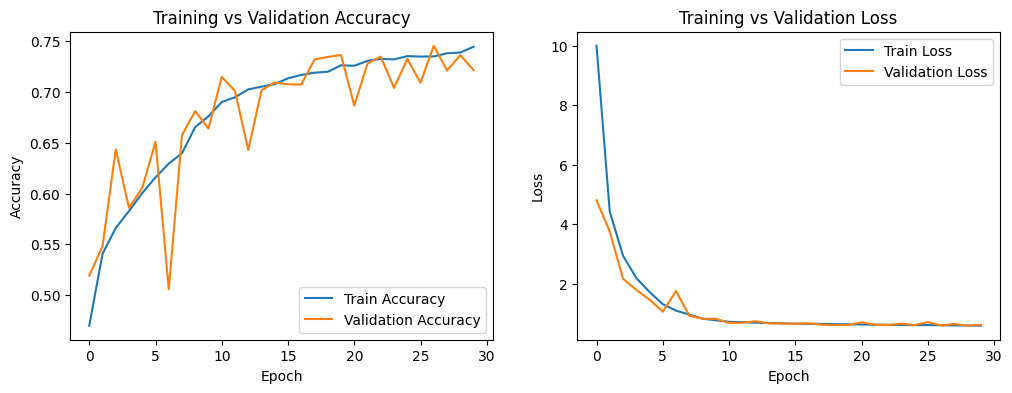

In [157]:

plt.figure(figsize=(12, 4))

# plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [150]:
# It is important to note that the validation is more chaotic with accuracy than loss
# You can change the number of neurons in 4b-1 to change the results; you can also 
    # add the kernel regulaizer to add a penalty to the loss function based on a layer
    # weights (kernel), to prevent overfitting.

<class 'pandas.core.frame.DataFrame'>
